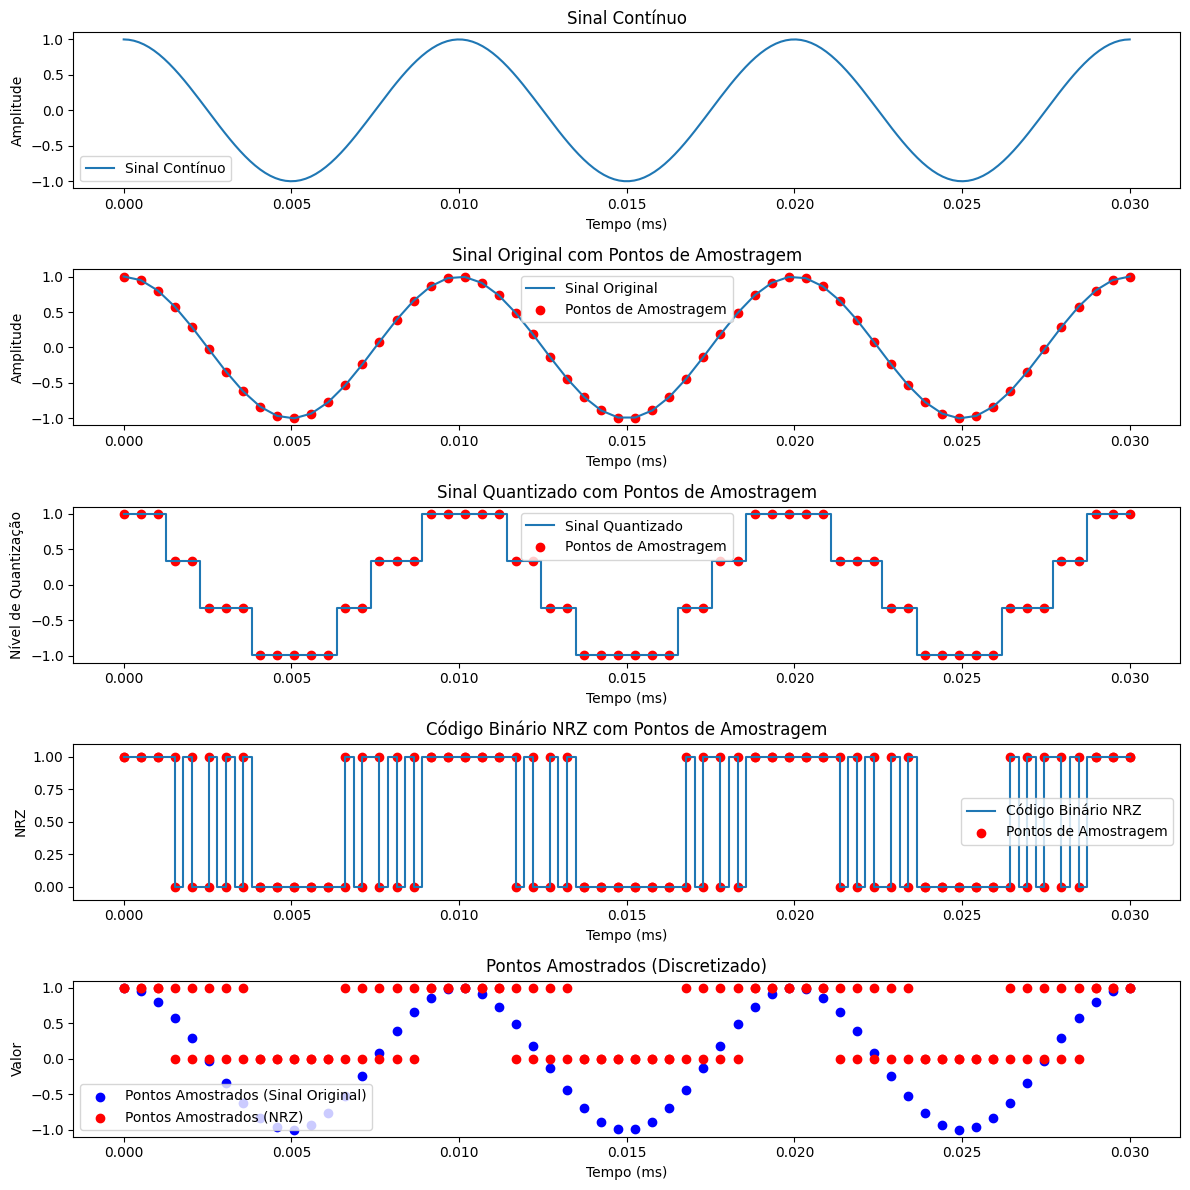

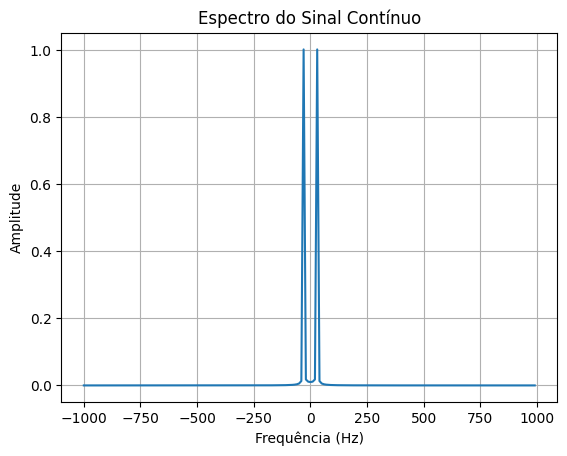

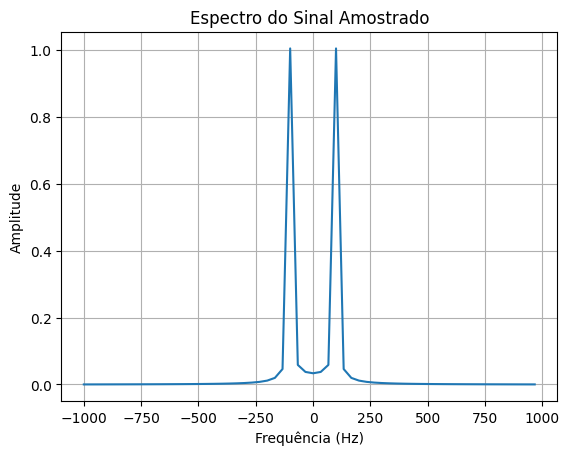

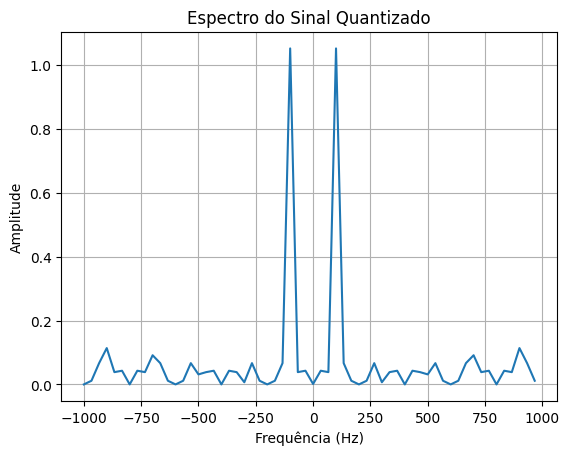

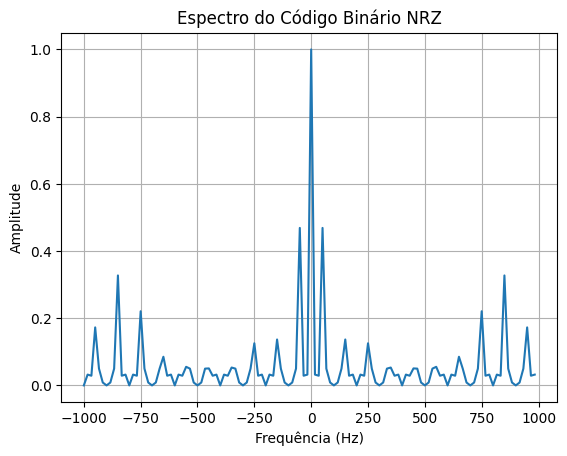

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def quantizar_sinal(sinal, num_niveis):
    if num_niveis <= 1:
        raise ValueError("O número de níveis de quantização deve ser maior que 1.")
    
    valor_min = np.min(sinal)
    valor_max = np.max(sinal)
    
    epsilon = 1e-10
    if valor_max == valor_min:
        valor_max += epsilon
    
    niveis_quant = np.linspace(valor_min, valor_max, num_niveis)
    
    q = (valor_max - valor_min) / (num_niveis - 1)
    if np.isnan(q) or np.isinf(q):
        raise ValueError("Erro de quantização: q é NaN ou infinito.")
    
    sinal_quantizado = valor_min + q * np.round((sinal - valor_min) / q)
    
    if np.any(np.isnan(sinal_quantizado)):
        raise ValueError("Erro de quantização: sinal_quantizado contém NaN.")
    
    return sinal_quantizado, niveis_quant

def gerar_codigo_binario(sinal_quantizado, num_niveis):
    num_bits = int(np.ceil(np.log2(num_niveis)))
    sinal_min = np.min(sinal_quantizado)
    sinal_max = np.max(sinal_quantizado)
    
    if sinal_max == sinal_min:
        raise ValueError("Erro de quantização: sinal_max é igual a sinal_min, o que causará divisão por zero.")
    
    codigo_binario = [
        np.binary_repr(
            int((nivel - sinal_min) * (num_niveis - 1) / (sinal_max - sinal_min)), 
            width=num_bits
        ) 
        for nivel in sinal_quantizado
    ]
    return codigo_binario

def plot_fft(signal, sampling_rate, title):
    N = len(signal)
    T = 1.0 / sampling_rate
    yf = np.fft.fft(signal)
    xf = np.fft.fftfreq(N, T)
    
    yf_shifted = np.fft.fftshift(yf)
    xf_shifted = np.fft.fftshift(xf)
    
    plt.figure()
    plt.plot(xf_shifted, 2.0/N * np.abs(yf_shifted))
    plt.grid()
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.show()

# Entrada de características do sinal
potencia = float(input("Digite a potência desejada (dB): "))
frequencia = int(input("Digite a frequência desejada (Hz): "))
ciclos = int(input("Digite o número de ciclos: "))
duracao = float((1 / frequencia) * ciclos)
amostragem = int(input("Digite o número de amostras por período (Maior ou igual a 2): "))
taxa_amostragem = int(amostragem * ciclos)

# Cálculo da amplitude a partir da potência
amplitude = 10**(potencia / 10)

# Número de níveis de quantização
num_niveis = int(input("Digite os níveis de quantização: "))

if num_niveis <= 1:
    raise ValueError("O número de níveis de quantização deve ser maior que 1.")

tempo = np.linspace(0, duracao, taxa_amostragem, endpoint=True)
sinal = amplitude * np.cos(2 * np.pi * frequencia * tempo)

if np.any(np.isnan(sinal)):
    raise ValueError("Erro no sinal original: sinal contém NaN.")

sinal_quantizado, niveis_quant = quantizar_sinal(sinal, num_niveis)

if np.any(np.isnan(sinal_quantizado)):
    raise ValueError("Erro de quantização: sinal_quantizado contém NaN após a quantização.")

codigo_binario = gerar_codigo_binario(sinal_quantizado, num_niveis)

grafico_binario = []
tempo_grafico = []
for i in range(len(codigo_binario)):
    for bit in codigo_binario[i]:
        if bit == '1':
            grafico_binario.append(1)
        else:
            grafico_binario.append(0)
        tempo_grafico.append(tempo[i])

tempo_alta_resolucao = np.linspace(0, duracao, 200)
sinal_continuo = amplitude * np.cos(2 * np.pi * frequencia * tempo_alta_resolucao)

plt.figure(figsize=(12, 12))

plt.subplot(5, 1, 1)
plt.plot(tempo_alta_resolucao, sinal_continuo, label='Sinal Contínuo')
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.title('Sinal Contínuo')
plt.legend()


plt.subplot(5, 1, 2)
plt.plot(tempo, sinal, label='Sinal Original')
plt.scatter(tempo, sinal, color='red', label='Pontos de Amostragem')  
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.title('Sinal Original com Pontos de Amostragem')
plt.legend()

plt.subplot(5, 1, 3)
plt.step(tempo, sinal_quantizado, where='mid', label='Sinal Quantizado')
plt.scatter(tempo, sinal_quantizado, color='red', label='Pontos de Amostragem')  
plt.xlabel('Tempo (ms)')
plt.ylabel('Nível de Quantização')
plt.title('Sinal Quantizado com Pontos de Amostragem')
plt.legend()

plt.subplot(5, 1, 4)
plt.step(tempo_grafico, grafico_binario, where='mid', label='Código Binário NRZ')
plt.scatter(tempo_grafico, grafico_binario, color='red', label='Pontos de Amostragem')
plt.xlabel('Tempo (ms)')
plt.ylabel('NRZ')
plt.title('Código Binário NRZ com Pontos de Amostragem')
plt.ylim(-0.1, 1.1)
plt.legend()

plt.subplot(5, 1, 5)
plt.scatter(tempo, sinal, color='blue', label='Pontos Amostrados (Sinal Original)')
plt.scatter(tempo_grafico, grafico_binario, color='red', label='Pontos Amostrados (NRZ)')
plt.xlabel('Tempo (ms)')
plt.ylabel('Valor')
plt.title('Pontos Amostrados (Discretizado)')
plt.legend()


plt.tight_layout()
plt.show()


# Cálculo da taxa de amostragem para a FFT
sampling_rate = taxa_amostragem / duracao

# Plotando os espectros de Fourier

plot_fft(sinal_continuo, sampling_rate, 'Espectro do Sinal Contínuo')

plot_fft(sinal, sampling_rate, 'Espectro do Sinal Amostrado')

plot_fft(sinal_quantizado, sampling_rate, 'Espectro do Sinal Quantizado')

plot_fft(grafico_binario, sampling_rate, 'Espectro do Código Binário NRZ')


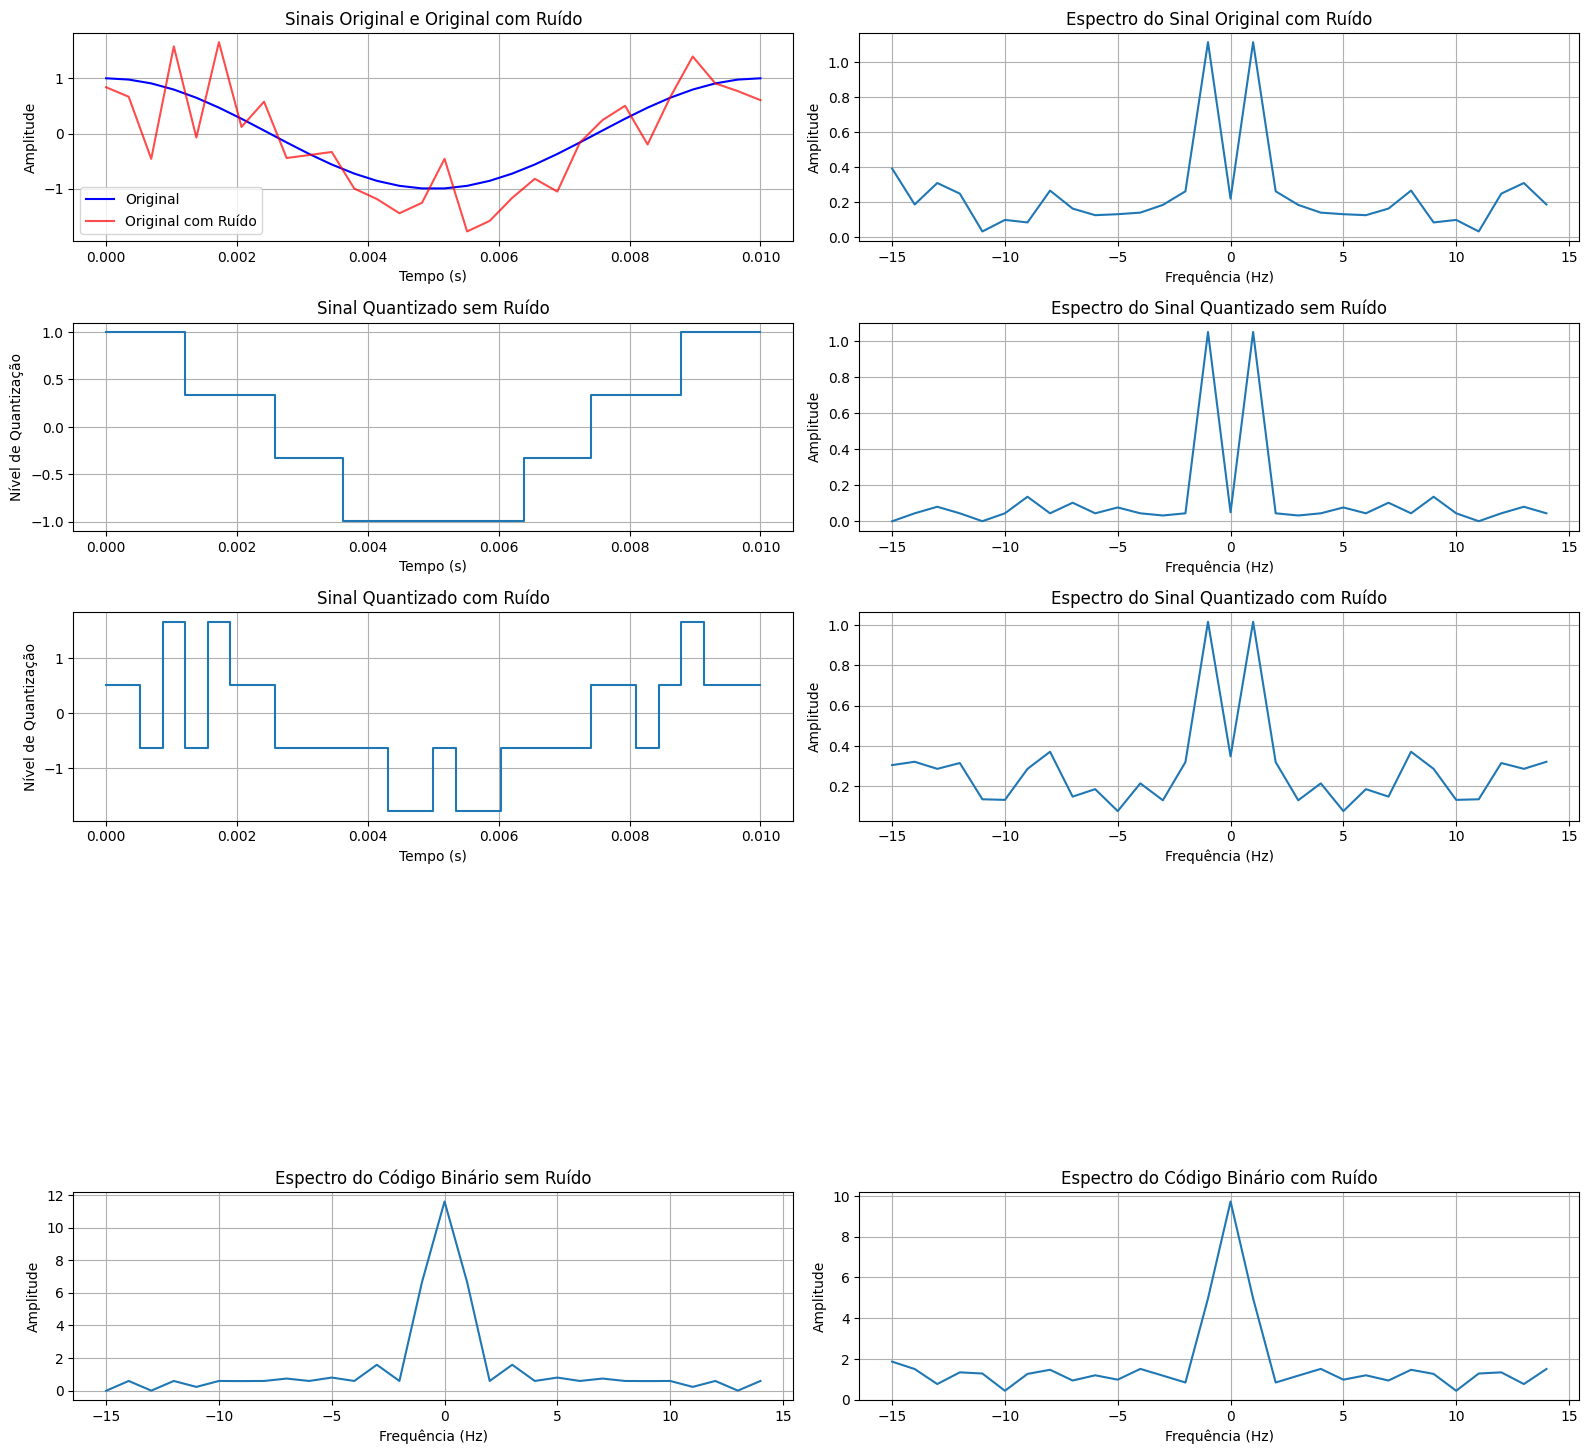

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def quantizar_sinal(sinal, num_niveis):
    if num_niveis <= 1:
        raise ValueError("O número de níveis de quantização deve ser maior que 1.")
    
    valor_min = np.min(sinal)
    valor_max = np.max(sinal)
    
    epsilon = 1e-10
    if valor_max == valor_min:
        valor_max += epsilon
    
    niveis_quant = np.linspace(valor_min, valor_max, num_niveis)
    
    q = (valor_max - valor_min) / (num_niveis - 1)
    if np.isnan(q) or np.isinf(q):
        raise ValueError("Erro de quantização: q é NaN ou infinito.")
    
    sinal_quantizado = valor_min + q * np.round((sinal - valor_min) / q)
    
    if np.any(np.isnan(sinal_quantizado)):
        raise ValueError("Erro de quantização: sinal_quantizado contém NaN.")
    
    return sinal_quantizado, niveis_quant

def gerar_codigo_binario(sinal_quantizado, num_niveis):
    num_bits = int(np.ceil(np.log2(num_niveis)))
    sinal_min = np.min(sinal_quantizado)
    sinal_max = np.max(sinal_quantizado)
    
    if sinal_max == sinal_min:
        raise ValueError("Erro de quantização: sinal_max é igual a sinal_min, o que causará divisão por zero.")
    
    codigo_binario = [
        np.binary_repr(
            int((nivel - sinal_min) * (num_niveis - 1) / (sinal_max - sinal_min)), 
            width=num_bits
        ) 
        for nivel in sinal_quantizado
    ]
    
    codigo_binario_completo = ''.join(codigo_binario)  # Sequência de bits completa
    
    return codigo_binario, codigo_binario_completo

def plot_fft(ax, signal, sampling_rate, title):
    N = len(signal)
    T = 1.0 / sampling_rate
    yf = np.fft.fft(signal)
    xf = np.fft.fftfreq(N, T)
    
    yf_shifted = np.fft.fftshift(yf)
    xf_shifted = np.fft.fftshift(xf)
    
    ax.plot(xf_shifted, 2.0/N * np.abs(yf_shifted))
    ax.grid()
    ax.set_xlabel('Frequência (Hz)')
    ax.set_ylabel('Amplitude')
    ax.set_title(title)

# Entrada de características do sinal
potencia = float(input('Pot: '))
frequencia = float(input('Frequência:  (hz)'))
ciclos = float(input('Periodos: '))
duracao = float((1 / frequencia) * ciclos)
amostragem = int(input('Amostras por Periodo:'))
taxa_amostragem = int(amostragem * ciclos)


# Cálculo da amplitude a partir da potência
amplitude = 10**(potencia / 10)

# Número de níveis de quantização
num_niveis = int(input('Nivel de Quantização'))

if num_niveis <= 1:
    raise ValueError("O número de níveis de quantização deve ser maior que 1.")

tempo = np.linspace(0, duracao, taxa_amostragem, endpoint=True)
sinal_original = amplitude * np.cos(2 * np.pi * frequencia * tempo)

# Adicionar ruído branco ao sinal original
SNR = float(input('Relação Sinal Ruido'))

ruido = np.random.normal(0, SNR, len(sinal_original))  # Amplitude do ruído = 0.1
sinal_original_ruidoso = sinal_original + ruido

# Quantizar o sinal original ruidoso
sinal_quantizado_sem_ruido, niveis_quant = quantizar_sinal(sinal_original, num_niveis)
sinal_quantizado_com_ruido, _ = quantizar_sinal(sinal_original_ruidoso, num_niveis)

# Gerar código binário a partir do sinal quantizado
codigo_binario_sem_ruido, _ = gerar_codigo_binario(sinal_quantizado_sem_ruido, num_niveis)
codigo_binario_com_ruido, codigo_binario_completo_com_ruido = gerar_codigo_binario(sinal_quantizado_com_ruido, num_niveis)

# Plotando sinal original com ruído e sinal original, sinal quantizado sem ruído, sinal quantizado com ruído, código binário sem ruído, código binário com ruído e suas transformadas de Fourier
plt.figure(figsize=(16, 20))

# Sinal Original e Sinal Original com Ruído
ax1 = plt.subplot(7, 2, 1)
ax1.plot(tempo, sinal_original, label='Original', color='blue')
ax1.plot(tempo, sinal_original_ruidoso, label='Original com Ruído', color='red', alpha=0.7)
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Sinais Original e Original com Ruído')
ax1.legend()
ax1.grid(True)

ax2 = plt.subplot(7, 2, 2)
plot_fft(ax2, sinal_original_ruidoso, taxa_amostragem, 'Espectro do Sinal Original com Ruído')

# Sinal Quantizado sem Ruído
ax3 = plt.subplot(7, 2, 3)
ax3.step(tempo, sinal_quantizado_sem_ruido, where='mid')
ax3.set_xlabel('Tempo (s)')
ax3.set_ylabel('Nível de Quantização')
ax3.set_title('Sinal Quantizado sem Ruído')
ax3.grid(True)

ax4 = plt.subplot(7, 2, 4)
plot_fft(ax4, sinal_quantizado_sem_ruido, taxa_amostragem, 'Espectro do Sinal Quantizado sem Ruído')

# Sinal Quantizado com Ruído
ax5 = plt.subplot(7, 2, 5)
ax5.step(tempo, sinal_quantizado_com_ruido, where='mid')
ax5.set_xlabel('Tempo (s)')
ax5.set_ylabel('Nível de Quantização')
ax5.set_title('Sinal Quantizado com Ruído')
ax5.grid(True)

ax6 = plt.subplot(7, 2, 6)
plot_fft(ax6, sinal_quantizado_com_ruido, taxa_amostragem, 'Espectro do Sinal Quantizado com Ruído')

# Código Binário sem Ruído


ax8 = plt.subplot(7, 2, 9)
plot_fft(ax8, np.array([int(bit) for bit in codigo_binario_sem_ruido]), len(codigo_binario_sem_ruido), 'Espectro do Código Binário sem Ruído')



ax10 = plt.subplot(7, 2, 10)
plot_fft(ax10, np.array([int(bit) for bit in codigo_binario_com_ruido]), len(codigo_binario_com_ruido), 'Espectro do Código Binário com Ruído')

plt.tight_layout()
plt.show()


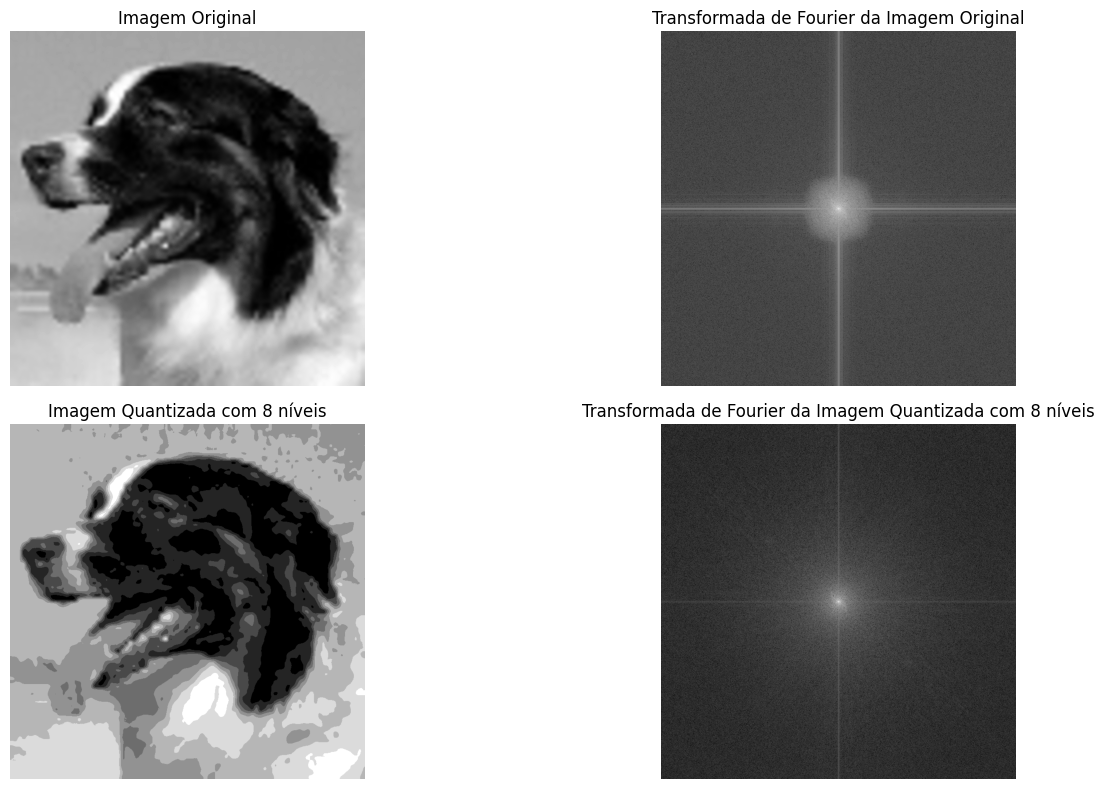

Número de bits por amostra: 3
Exemplo dos 10 primeiros valores do código binário:
Amostra 0: Valor quantizado: 0.7086834733893558 -> Código Binário: 101
Amostra 1: Valor quantizado: 0.7086834733893558 -> Código Binário: 101
Amostra 2: Valor quantizado: 0.7086834733893558 -> Código Binário: 101
Amostra 3: Valor quantizado: 0.7086834733893558 -> Código Binário: 101
Amostra 4: Valor quantizado: 0.7086834733893558 -> Código Binário: 101
Amostra 5: Valor quantizado: 0.7086834733893558 -> Código Binário: 101
Amostra 6: Valor quantizado: 0.7086834733893558 -> Código Binário: 101
Amostra 7: Valor quantizado: 0.7086834733893558 -> Código Binário: 101
Amostra 8: Valor quantizado: 0.7086834733893558 -> Código Binário: 101
Amostra 9: Valor quantizado: 0.7086834733893558 -> Código Binário: 101


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from urllib.request import urlopen
from io import BytesIO

# Função para quantizar o sinal (ou imagem)
def quantizar_sinal(sinal, num_niveis):
    valor_min = np.min(sinal)
    valor_max = np.max(sinal)
    
    niveis_quant = np.linspace(valor_min, valor_max, num_niveis)
    sinal_quantizado = np.round((sinal - valor_min) / (valor_max - valor_min) * (num_niveis - 1)) / (num_niveis - 1) * (valor_max - valor_min) + valor_min
    
    return sinal_quantizado, niveis_quant

# Função para gerar código binário
def gerar_codigo_binario(sinal_quantizado, num_niveis):
    num_bits = int(np.ceil(np.log2(num_niveis)))
    codigo_binario = [
        np.binary_repr(
            int((nivel - np.min(sinal_quantizado)) * (num_niveis - 1) / (np.max(sinal_quantizado) - np.min(sinal_quantizado))), 
            width=num_bits
        ) 
        for nivel in sinal_quantizado.flatten()
    ]
    return codigo_binario

# Função para plotar a transformada de Fourier
def plot_fft(ax, signal, title):
    fft_signal = np.fft.fftshift(np.fft.fft2(signal))
    magnitude_spectrum = np.abs(fft_signal)
    
    ax.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
    ax.set_title(title)
    ax.axis('off')

# URL de uma imagem de exemplo válida
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/Dog_face.png/800px-Dog_face.png'

# Carregar a imagem da URL usando urllib
try:
    response = urlopen(url)
except Exception as e:
    print(f"Erro ao acessar a URL: {e}")
    exit()

image_bytes = BytesIO(response.read())

# Tentar abrir a imagem especificando o formato
try:
    img = Image.open(image_bytes).convert('L')
except IOError:
    print("Erro ao abrir a imagem. Verifique o formato ou a URL.")
    exit()

# Converter a imagem para um array numpy
img_array = np.array(img)

# Normalizar os valores dos pixels para o intervalo [0, 1]
img_normalized = img_array / 255.0

# Número de níveis de quantização desejado
num_niveis = 8

# Processar a imagem como um sinal
img_quantizada, _ = quantizar_sinal(img_normalized, num_niveis)

# Gerar código binário para a imagem quantizada
codigo_binario = gerar_codigo_binario(img_quantizada, num_niveis)

# Plotar as imagens e a transformada de Fourier
plt.figure(figsize=(16, 8))

# Imagem Original e sua transformada de Fourier
plt.subplot(2, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plot_fft(plt.gca(), img_array, 'Transformada de Fourier da Imagem Original')

# Imagem Quantizada e sua transformada de Fourier
plt.subplot(2, 2, 3)
plt.imshow(img_quantizada, cmap='gray')
plt.title(f'Imagem Quantizada com {num_niveis} níveis')
plt.axis('off')

plt.subplot(2, 2, 4)
plot_fft(plt.gca(), img_quantizada, f'Transformada de Fourier da Imagem Quantizada com {num_niveis} níveis')

plt.tight_layout()
plt.show()

# Informações sobre os bits gerados
print(f"Número de bits por amostra: {int(np.ceil(np.log2(num_niveis)))}")
print(f"Exemplo dos 10 primeiros valores do código binário:")
for i in range(min(10, len(codigo_binario))):
    print(f"Amostra {i}: Valor quantizado: {img_quantizada.flatten()[i]} -> Código Binário: {codigo_binario[i]}")
